
<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning Introduction - Lab (Credit Risk)</b></font> </p><font color='#FC7307' size=6>Student Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import tree

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# <font color='#347B98'> 1. Data Preparation

## $\Delta$ 1.1 - Load Credit Default Data

The data comes from the [Kaggle challenge](https://www.kaggle.com/c/GiveMeSomeCredit), which requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.


In [3]:
### load data
df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/cs-training.csv', sep = ',',header = 0)

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
### shape of the data
df.shape

(150000, 12)

So in training dataset, we have 150000 customers with 11 predictors

## $\Delta$ 1.2 - Explore the target distribution (default rate)
> Column `SeriousDlqin2yrs` is the target variable we're interested in modeling. 

**Question**
- Check the default rate in the training dataset.
- Plot the target variable distribution using matplotlib or pd.series.plot()

In [6]:
##########################
# Your Code Below
##########################





count    150000.000000
mean          0.066840
std           0.249746
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64

The default rate is 6.684%, implying this is an imbalanced classification problem. You can revisit the dataset later when we finish the discussions about the imbalanced classification topic.
By the way, 6.684% default rate in credit card portfolio is actually much higher than the actual numbers in big banks. Therefore, in reality the degree of imbalance is even more severe.

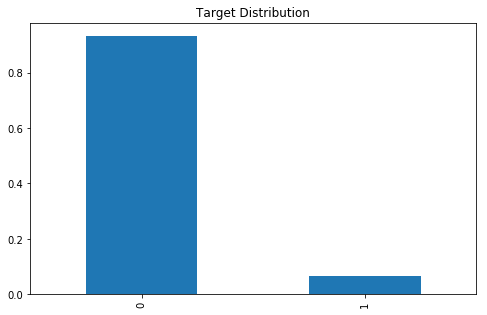

In [7]:
##########################
# Your Code Below
##########################




---
# <font color='#347B98'> 2. Data Exploration

## $\Delta$ 2.1 - Data Summary

**Question**
- Calculate summary statistics for numerical variables
- Plot the histogram of each numeric feature
- Plot the boxplot of each numerif feature
- Plot the pariplot using seaborn's `sns.pairplot` module

### <font color='#FC7307'> $\delta$ `describe` numeric features

In [8]:
df.describe().round(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


### <font color='#FC7307'> $\delta$ Histograms

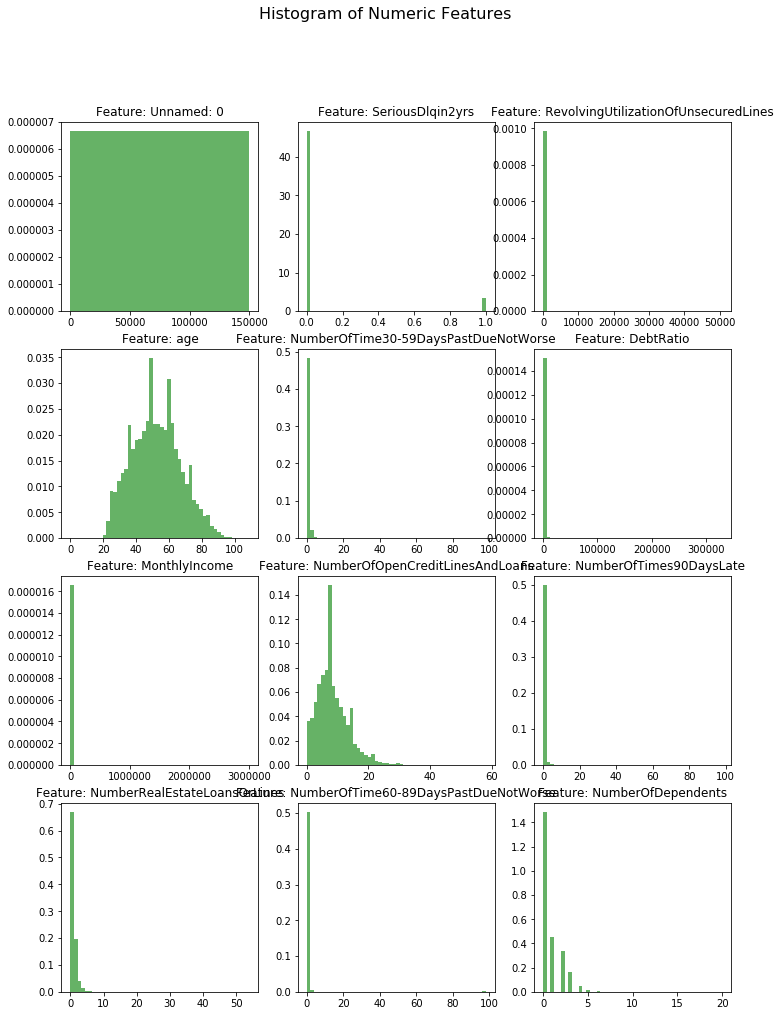

In [11]:
import math

num_features = [df.columns[i] for i in range(len(df.columns)) if df.dtypes[i]!='O']

n_num_cols = len(num_features)
n_subplot_cols = 3
n_subplot_rows = math.ceil(n_num_cols / n_subplot_cols)
fig_width = 4

#print(n_subplot_rows)
#print(n_subplot_cols)

figure, axes = plt.subplots(n_subplot_rows,
                            n_subplot_cols, 
                            figsize=(n_subplot_cols * fig_width, n_subplot_rows * fig_width)
                           )
figure.suptitle('Histogram of Numeric Features', fontsize=16)

if n_subplot_cols > 1 and n_subplot_rows > 1:
    for ix_col in range(n_num_cols):
        ix_ax_row = ix_col // n_subplot_cols 
        ix_ax_col = ix_col % n_subplot_cols
        n, bins, patches = axes[ix_ax_row][ix_ax_col].hist(df.iloc[:,ix_col].dropna(), 
                                                           bins=50, 
                                                           density=1, 
                                                           facecolor='g', 
                                                           alpha=0.6)
        axes[ix_ax_row][ix_ax_col].set_title('Feature: {}'.format(num_features[ix_col]))
else:
    for ix_col in range(n_num_cols):
        n, bins, patches = axes[ix_col].hist(df.iloc[:,ix_col].dropna(), 
                                             bins=50, 
                                             density=1, 
                                             facecolor='g', 
                                             alpha=0.6)
        axes[ix_col].set_title('Feature: {}'.format(num_features[ix_col]))

plt.show()

### <font color='#FC7307'> $\delta$ Boxplots
    
**Questions**

- Plot boxplot for the following variables
  - `RevolvingUtilizationOfUnsecuredLines`
  - `DebtRatio`
  - `MonthlyIncome`

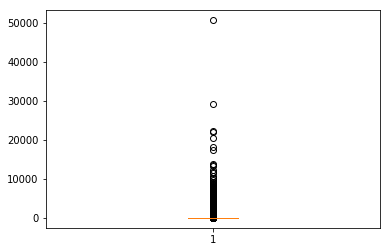

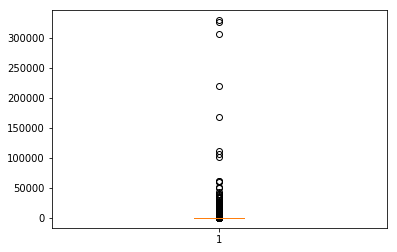

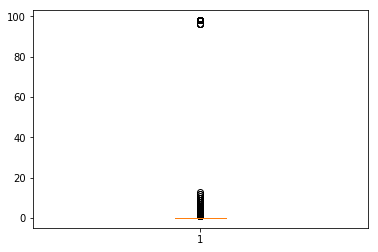

In [12]:
##################################
### Your Code Below
##################################



**Note**
> Looks like some features have outliers. We can either deal with the outlier or choose an algorithm that is immune to outliers

## $\Delta$ 2.2 - Check and Replace Missing

** Questions **
- Find columns that have missing values
- Replace missing values

In [13]:
##################################
### Your Code Below
##################################

### check missing variables and missing percentages







Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

### <font color='#FC7307'> Missing Replacement - `NumberOfDependents`

In [14]:
##################################
### Your Code Below
##################################

# fill NAs





### <font color='#FC7307'> Missing Replacement - `MonthlyIncome`

Around 19.8% of people do not have MonthlyIncome (could be an issue since MonthlyIncome is generally believed as an important predictor). The median values by each group (i.e. default/non-default) is chosen to fill in the NAs. Be careful that in order to do it, you have to split your data into training and testing first. 

#### Train/Test Split before replacing missing with median for `NumberOfDependents`

---
# <font color='#347B98'> 3. Train/Test Split

## $\Delta$ 3.1 - Split data into training and testing

In [15]:
##################################
### Your Code Below
##################################

# split data into training(70%) and testing(30%); set a random seed for the sake of reproducibility
train, test = train_test_split(df, test_size = 0.3, shuffle=True, random_state = 2018)

----
# <font color='#347B98'> 4. Feature Preprocessing & Engineering

## $\Delta$ 4.1 - Fill missing income by median values 
> Do the same for training and test data

**Questions**
- Fill missing `MonthlyIncome` by median values 

In [16]:
####################
# Your Code Below
####################



In [18]:
features = np.array(['RevolvingUtilizationOfUnsecuredLines',
                     'DebtRatio',
                     'MonthlyIncome',
                     'NumberOfDependents',
                     'NumberOfOpenCreditLinesAndLoans',
                     'NumberOfTime30-59DaysPastDueNotWorse',
                     'NumberOfTime60-89DaysPastDueNotWorse',
                     'NumberOfTimes90DaysLate',
                     'NumberRealEstateLoansOrLines',
                     'age'
                    ])

----
# <font color='#347B98'> 5. Model Fitting

## $\Delta$ 5.1 - Fit a Random Forest Model


### <font color='#FC7307'> Instantiate the RF Model
    
**Help**
- [Sklearn `RandomForestClassifier` Doc](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Sample code: https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

In [19]:
rf_clf = RandomForestClassifier(
        n_estimators = 100, # number of trees in the forest, default is 10
        max_features = 'sqrt', # number of features to be splitted on each node
        n_jobs = -1, # the number of jobs is set to the number of cores
        oob_score = True, # whether to use out-of-bag samples to estimate the generalization accuracy
        random_state = 2018,
        class_weight = 'balanced_subsample' # to address the imbalanced issue
        )
rf_clf

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=2018,
            verbose=0, warm_start=False)

### <font color='#FC7307'> Fit the algorithm to your trainig data
> Use the dataset with missing replaced

In [20]:
rf_clf.fit(train_NoMissing[features], train_NoMissing['SeriousDlqin2yrs'])


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=2018,
            verbose=0, warm_start=False)

### <font color='#FC7307'> Generate Predictions for the Testing Data

> HINT: `clf.predict_proba`

In [26]:
rf_predicted_prob = rf_clf.predict_proba(test_NoMissing[features]) # prediction

In [27]:
rf_predicted_prob

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.65, 0.35],
       ...,
       [0.85, 0.15],
       [0.98, 0.02],
       [1.  , 0.  ]])

### <font color='#FC7307'> Evaluation the Model

> HINT: `sklearn.metrics.roc_auc_score`

In [28]:
from sklearn.metrics import roc_auc_score

help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics.ranking:

roc_auc_score(y_true, y_score, average='macro', sample_weight=None, max_fpr=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation is restricted to the binary classification task
    or multilabel classification task in label indicator format.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels or binary label indicators.
    
    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers). For binary
        y_true, y_score is supposed to be the score of the class with greater
       

In [29]:
y_true = test_NoMissing['SeriousDlqin2yrs']
y_scores = rf_predicted_prob[:,1]
'AUC using Random Forest is %.4f' % roc_auc_score(y_true, y_scores)

'AUC using Random Forest is 0.8334'

### <font color='#FC7307'> Plot the variable importance

> HINT: `clf.feature_importances_`

RevolvingUtilizationOfUnsecuredLines    0.265902
DebtRatio                               0.138679
MonthlyIncome                           0.114550
NumberOfDependents                      0.032092
NumberOfOpenCreditLinesAndLoans         0.077941
NumberOfTime30-59DaysPastDueNotWorse    0.086638
NumberOfTime60-89DaysPastDueNotWorse    0.051273
NumberOfTimes90DaysLate                 0.082233
NumberRealEstateLoansOrLines            0.032623
age                                     0.118069
Name: Importance, dtype: float64


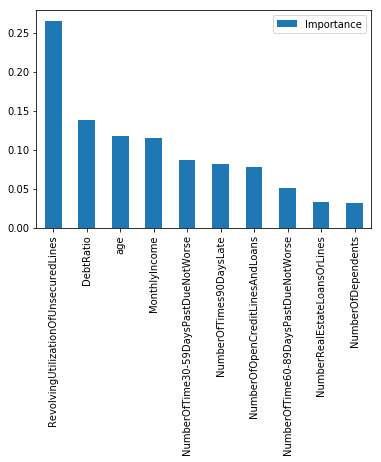

In [30]:
# check the variable importance
importance = rf_clf.feature_importances_
importance = pd.DataFrame(importance, 
                          columns=["Importance"],
                          index = features
                         )

print(importance.iloc[:, 0])

importance.sort_values(by='Importance', ascending=False).plot(kind='bar')

## $\Delta$ 5.2 - Fit a Logistic Regression Model


### <font color='#FC7307'> Instantiate the Logistic Regression Model
    
**Help**
- [Sklearn `LogisticRegression` Doc](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [31]:
####################
# Your Code Below
####################



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### <font color='#FC7307'> Fit the algorithm to your trainig data
> Use the dataset with missing replaced

In [32]:
####################
# Your Code Below
####################




/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### <font color='#FC7307'> Generate Predictions for the Testing Data

> HINT: `clf.predict_proba`

In [33]:
####################
# Your Code Below
####################





In [34]:
lr_predicted_prob

array([[0.94839572, 0.05160428],
       [0.94143033, 0.05856967],
       [0.6155909 , 0.3844091 ],
       ...,
       [0.86882477, 0.13117523],
       [0.95919413, 0.04080587],
       [0.85859164, 0.14140836]])

### <font color='#FC7307'> Evaluation the Model

> HINT: `sklearn.metrics.roc_auc_score`

In [35]:
####################
# Your Code Below
####################






'AUC using Random Forest is 0.6910'

** Discussions **
> Logistic Regression significantly underperform compared to RandomForest model. Why?   
> How would you approach feature engineering for Logistic Regression?  
> Will variable binning, WOE help improve the LR model? 